In [1]:
%matplotlib inline
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

In [2]:
iris = datasets.load_iris()
X = iris.data
Y = iris.target

In [3]:
D = X.shape[1]
mean = np.mean(X, axis=0)
cov = np.cov(X.T)
mean, cov

(array([5.84333333, 3.05733333, 3.758     , 1.19933333]),
 array([[ 0.68569351, -0.042434  ,  1.27431544,  0.51627069],
        [-0.042434  ,  0.18997942, -0.32965638, -0.12163937],
        [ 1.27431544, -0.32965638,  3.11627785,  1.2956094 ],
        [ 0.51627069, -0.12163937,  1.2956094 ,  0.58100626]]))

In [4]:
n_dim = L = 2
e_values, e_vectors = np.linalg.eigh(cov)
e_values = np.flip(e_values)
e_vectors = np.flip(e_vectors, axis=1)
e_vectors, e_values

(array([[-0.36138659,  0.65658877,  0.58202985,  0.31548719],
        [ 0.08452251,  0.73016143, -0.59791083, -0.3197231 ],
        [-0.85667061, -0.17337266, -0.07623608, -0.47983899],
        [-0.3582892 , -0.07548102, -0.54583143,  0.75365743]]),
 array([4.22824171, 0.24267075, 0.0782095 , 0.02383509]))

In [5]:
V = e_vectors[:, :n_dim]
Lambda = np.diag(e_values[:n_dim])
V, Lambda

(array([[-0.36138659,  0.65658877],
        [ 0.08452251,  0.73016143],
        [-0.85667061, -0.17337266],
        [-0.3582892 , -0.07548102]]),
 array([[4.22824171, 0.        ],
        [0.        , 0.24267075]]))

In [6]:
sigma = 1 / (D - L) * np.sum(e_values[L+1:])
sigma_I = sigma*np.eye(L)

W = V.dot(np.sqrt(Lambda - sigma_I))

M = W.T.dot(W) + sigma_I

In [7]:
def project(x, mean, M_inv, W, sigma):
    new_mean = M_inv.dot(W.T).dot(x - mean)
#     new_sigma = sigma*M_inv
#     z = np.random.multivariate_normal(new_mean, new_sigma, 1)[0]
    return new_mean # retornando apenas a experança

M_inv = np.linalg.inv(M)
z = project(X[0], mean, M_inv, W, sigma)
z

array([1.30349698, 0.63224821])

In [8]:
def reconstruct(z, mean, W, sigma):
    new_mean = W.dot(z) + mean
    x = np.random.multivariate_normal(new_mean, sigma*np.eye(D), 1)[0]
    return x

x = reconstruct(z, mean, W, sigma)
x

array([4.92767541, 3.57278139, 1.4385187 , 0.19402609])

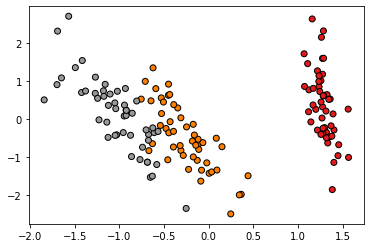

In [9]:
X_projected = np.array([project(x, mean, M_inv, W, sigma) for x in X])
plt.scatter(X_projected[:, 0], X_projected[:, 1], c=Y, cmap=plt.cm.Set1,
            edgecolor='k')

### Comparando com o PCA do sklearn

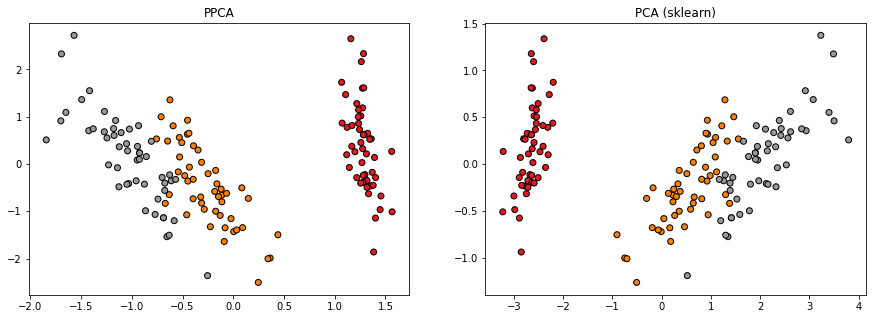

In [10]:
from sklearn.decomposition import PCA

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
X_projected = np.array([project(x, mean, M_inv, W, sigma) for x in X])
plt.scatter(X_projected[:, 0], X_projected[:, 1], c=Y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.title("PPCA")

plt.subplot(1,2,2)
pca = PCA(n_components=2)
X_projected = pca.fit(X).transform(X)

plt.scatter(X_projected[:, 0], X_projected[:, 1], c=Y, cmap=plt.cm.Set1,
            edgecolor='k')
_ = plt.title("PCA (sklearn)")

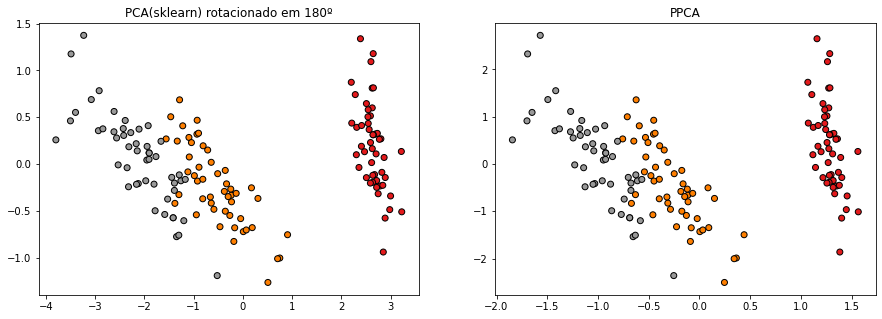

In [11]:
rotation = 180
theta = np.deg2rad(rotation)
R = np.array([[np.cos(theta), 0],[0, 1]]) #rotacionando em torno do eixo Y
X_rot = pca.transform(X).dot(R)

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.scatter(X_rot[:, 0], X_rot[:, 1], c=Y, cmap=plt.cm.Set1,
            edgecolor='k')
_ = plt.title(f"PCA(sklearn) rotacionado em {rotation}º")

plt.subplot(1,2,2)
X_projected = np.array([project(x, mean, M_inv, W, sigma) for x in X])
plt.scatter(X_projected[:, 0], X_projected[:, 1], c=Y, cmap=plt.cm.Set1,
            edgecolor='k')
_ = plt.title("PPCA")